# The scenario  will be as follows 
* Importing the libraries
* Data preparation 
* Data preprocessing
* Analysis data
* Visualization
* Split data
* Train & Test
* Evaluate model
* Calculate the result

## Import libraries

In [560]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

## data preparation

In [561]:
dataframe=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [562]:
dataframe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [563]:
dataframe.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [564]:
dataframe.describe(exclude=['int64', 'float'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [565]:
# display the many category in each column
columns = list(dataframe.columns)
for i in columns:
    if dataframe[i].dtype == 'object':
        print('=============',i,'============\n\n\n', dataframe[i].value_counts(), end='\n\n*********************\n')

============= gender ============


 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

*********************
============= ever_married ============


 Yes    3353
No     1757
Name: ever_married, dtype: int64

*********************
============= work_type ============


 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

*********************
============= Residence_type ============


 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

*********************
============= smoking_status ============


 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

*********************


* We can see that the majority group is `Married woman` who live in `Urban`, who do `Not smoke` and whose work is normally classified as `Private`.  

In [566]:
# # display the many category in each column
# columns = list(dataframe.columns)
# done_frame = []
# for i in columns:
#     key, values = [], []
#     dicts = {}
#     if dataframe[i].dtype == 'object':
#         key.append(i)
#         values.append(dataframe[i].value_counts())
#         for i in range(len(key)):
#             dicts[key[i]] = values[i]
#         # transform from dictionary to dataframe
#         done_frame.append(pd.DataFrame(dicts))
        
# #         print(i + '\n\n\n', dataframe[i].value_counts(), end='\n\n*********************\n')
# for i in range(len(done_frame)):
#     print(pd.DataFrame(done_frame[i]))

In [567]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* *there are some objects data type should deal with them*

In [568]:
dataframe.skew(axis=0, skipna=True)

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

## Data preprocessing

In [569]:
# check duplicated values 
dataframe.duplicated().unique() # there is no duplicated data

array([False])

In [570]:
# check missing values
dataframe.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* there are some missing values in column `BMI`

In [571]:
dataframe=dataframe.drop('id', axis=1) 

In [572]:
# rename column
dataframe.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [573]:
dataframe.columns = ['gender', 'age', 'hypertension', 'heartDisease', 'everMarried',
       'workType', 'ResidenceType', 'avgGlucoseLevel', 'bmi',
       'smokingStatus', 'stroke']

In [574]:
dataframe.columns

Index(['gender', 'age', 'hypertension', 'heartDisease', 'everMarried',
       'workType', 'ResidenceType', 'avgGlucoseLevel', 'bmi', 'smokingStatus',
       'stroke'],
      dtype='object')

In [575]:
# before i do any handling or visualization i will make a copy from date
data_copy = dataframe[:]

In [576]:
data_copy

,gender,age,hypertension,heartDisease,everMarried,workType,ResidenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### handling categorical data


In [577]:
# using label encoder
LE = LabelEncoder()
for i in ['gender', 'everMarried', 'workType', 'ResidenceType', 'smokingStatus']:
    dataframe[i] = LE.fit_transform(dataframe[i])
dataframe

,gender,age,hypertension,heartDisease,everMarried,workType,ResidenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [578]:
# replace null value with mean using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # make object from class
imputedData = imputer.fit(dataframe)
dataframe = imputedData.transform(dataframe)
# transform the data from 2D-array to Dataframe
columns = ['gender', 'age', 'hypertension', 'heartDisease', 'everMarried',
       'workType', 'ResidenceType', 'avgGlucoseLevel', 'bmi',
       'smokingStatus', 'stroke']
dataframe = pd.DataFrame(dataframe, columns=columns)
dataframe

,gender,age,hypertension,heartDisease,everMarried,workType,ResidenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.600000,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,28.893237,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.500000,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.400000,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,28.893237,2.0,0.0
5106,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.20,40.000000,2.0,0.0
5107,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.600000,2.0,0.0
5108,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.600000,1.0,0.0


In [579]:
dataframe.isna().sum()

gender             0
age                0
hypertension       0
heartDisease       0
everMarried        0
workType           0
ResidenceType      0
avgGlucoseLevel    0
bmi                0
smokingStatus      0
stroke             0
dtype: int64

In [580]:
dataframe.head()

,gender,age,hypertension,heartDisease,everMarried,workType,ResidenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.600000,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,28.893237,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.500000,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.400000,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.000000,2.0,1.0


### Handling outliers

In [581]:
dataframe.describe()

,gender,age,hypertension,heartDisease,everMarried,workType,ResidenceType,avgGlucoseLevel,bmi,smokingStatus,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [582]:
df = dataframe[['age', 'avgGlucoseLevel', 'bmi']]

In [583]:
# calculate the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [584]:
IQR

age                36.000
avgGlucoseLevel    36.845
bmi                 9.000
dtype: float64

In [585]:
df

,age,avgGlucoseLevel,bmi
0,67.0,228.69,36.600000
1,61.0,202.21,28.893237
2,80.0,105.92,32.500000
3,49.0,171.23,34.400000
4,79.0,174.12,24.000000
...,...,...,...
5105,80.0,83.75,28.893237
5106,81.0,125.20,40.000000
5107,35.0,82.99,30.600000
5108,51.0,166.29,25.600000


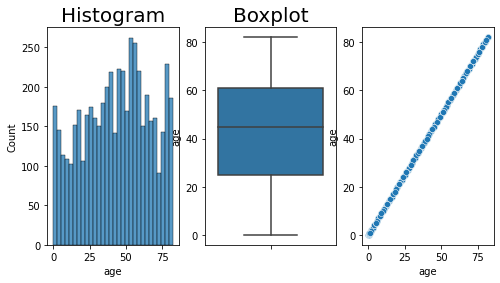

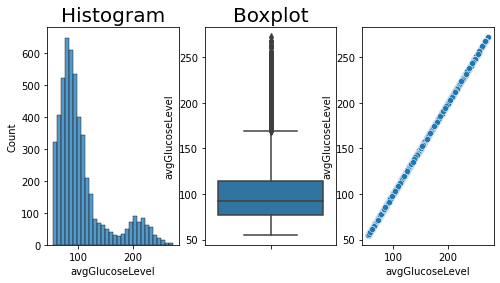

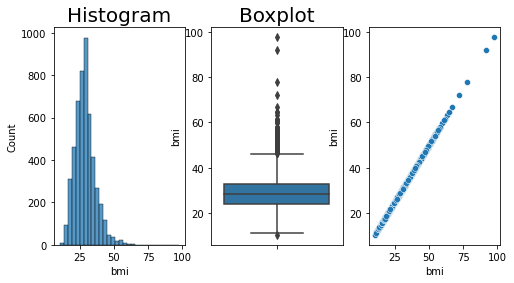

In [588]:
# Identifying Outliers with Visualization
for i in df:
    plt.figure(figsize=(8, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[i], bins=30)
    plt.title('Histogram', fontsize=20)

    # boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[i])
    plt.title('Boxplot', fontsize=20)

    # scatter
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=df[i], y=df[i])
    plt.show()

*  there are lot of outliers present in `avg_glucose_level` and `bmi`.

<AxesSubplot:>

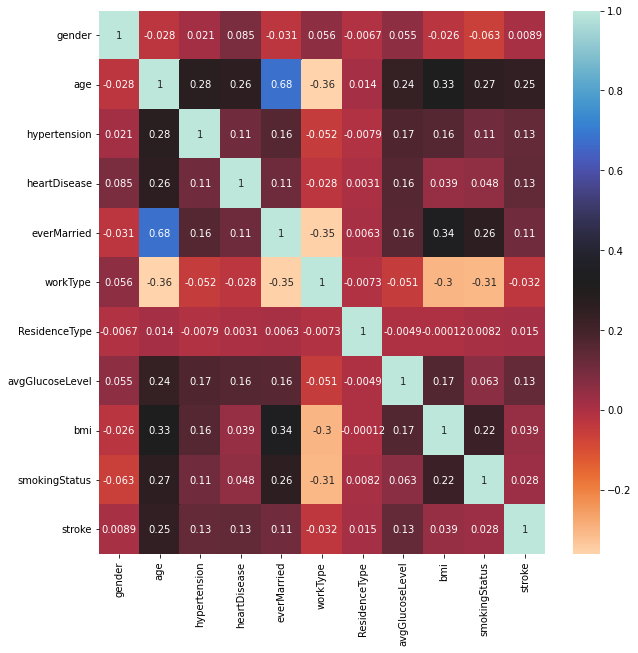

In [592]:
# display correlation between each column
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(dataframe, columns=columns).corr(), annot=True, cmap='icefire_r',ax=ax)

## visualization

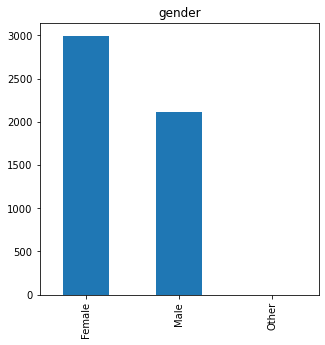

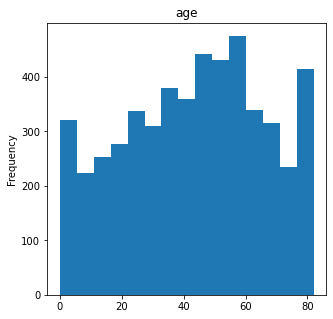

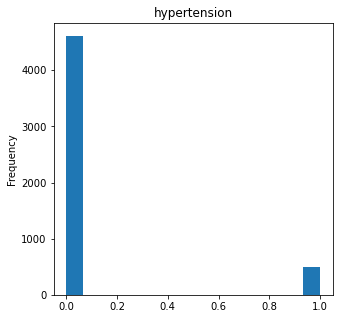

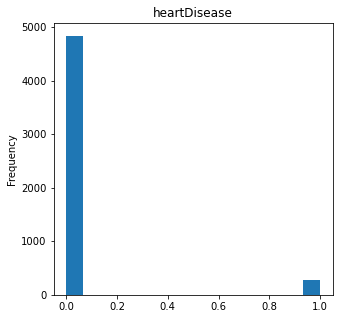

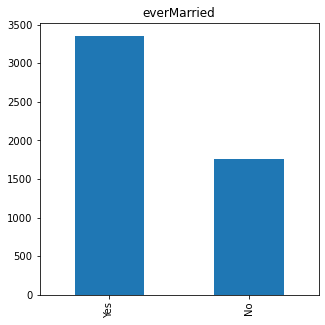

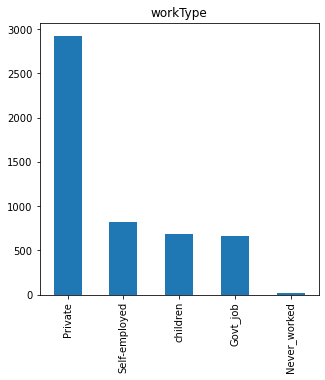

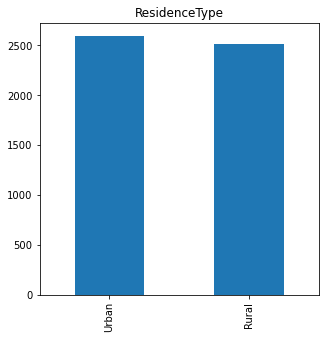

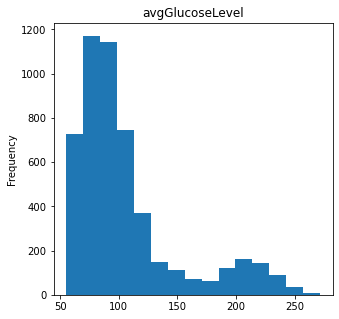

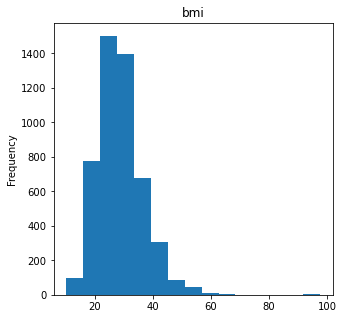

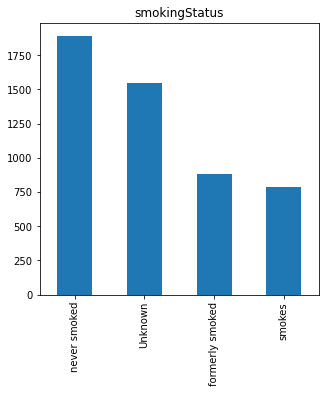

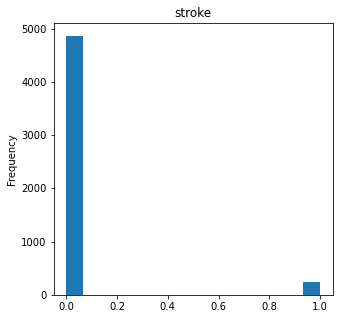

In [593]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
for column in data_copy:
    plt.figure(column, figsize = (5, 5))
    plt.title(column)
    if is_numeric_dtype(data_copy[column]):
        data_copy[column].plot(kind = 'hist', bins=15)
    elif is_string_dtype(data_copy[column]):
        data_copy[column].value_counts()[:10].plot(kind = 'bar')

In [594]:
num_list = [column for column in data_copy if is_numeric_dtype(data_copy[column])]
cat_list = [column for column in data_copy if is_string_dtype(data_copy[column])]
print('Numerical columns', num_list)
print('Categorical columns', cat_list)

Numerical columns ['age', 'hypertension', 'heartDisease', 'avgGlucoseLevel', 'bmi', 'stroke']
Categorical columns ['gender', 'everMarried', 'workType', 'ResidenceType', 'smokingStatus']


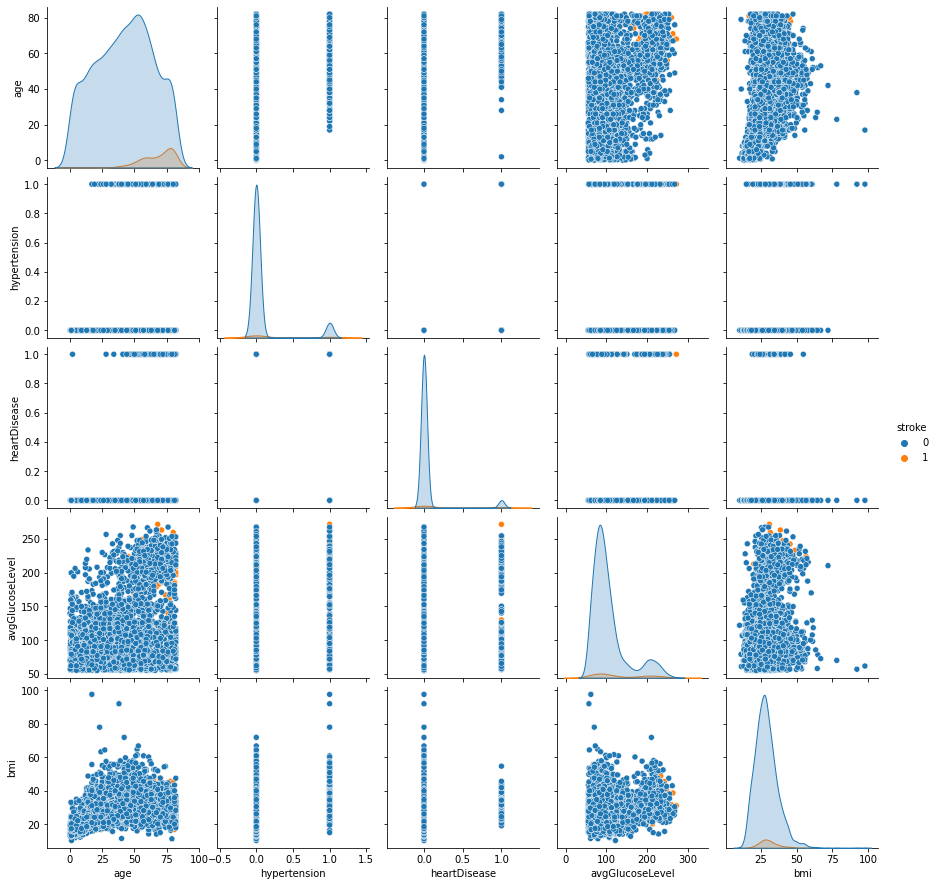

In [595]:
sns.pairplot(data_copy,height = 2.5, hue='stroke')

In [596]:
df=data_copy

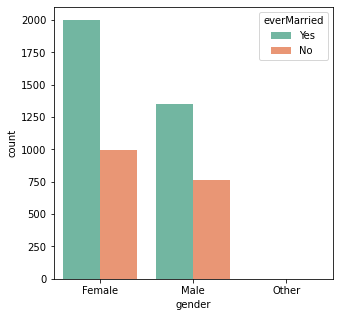

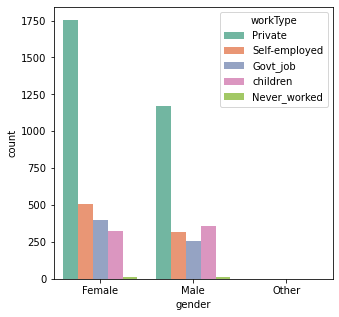

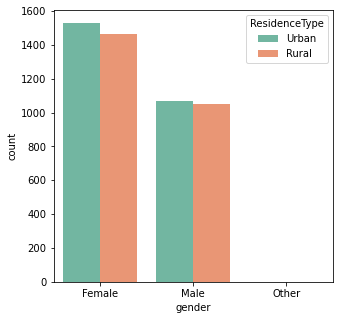

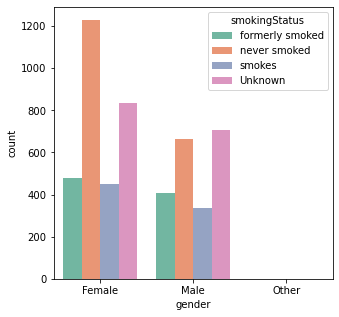

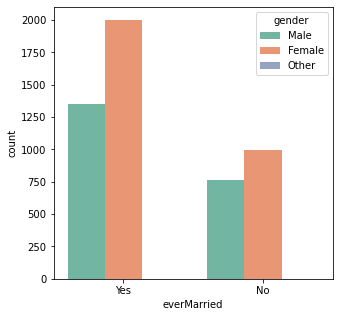

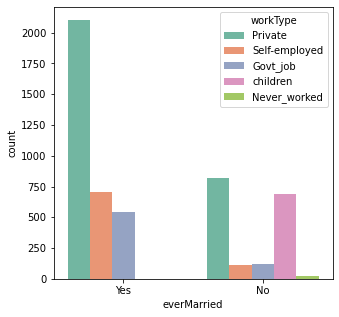

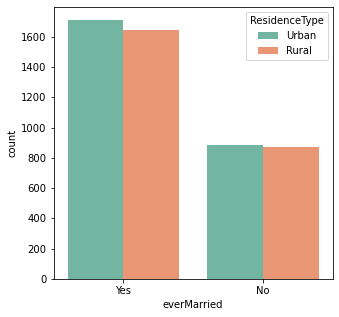

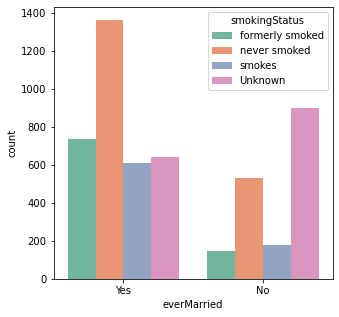

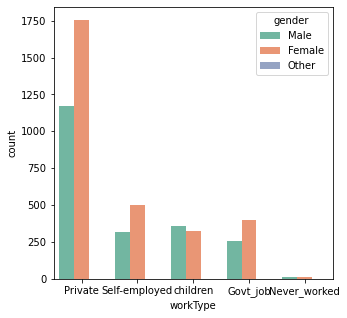

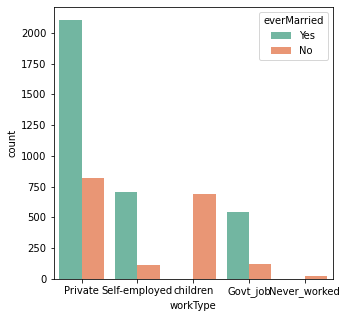

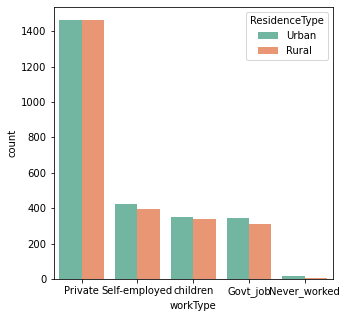

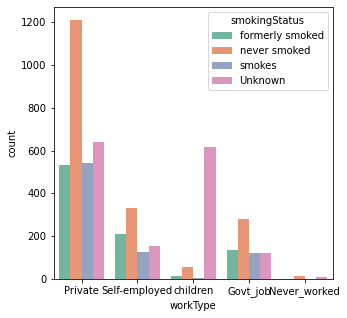

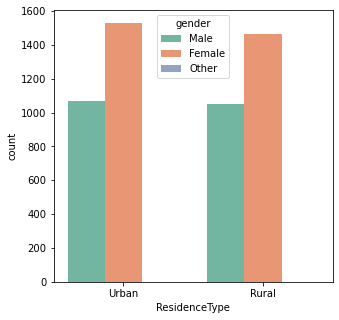

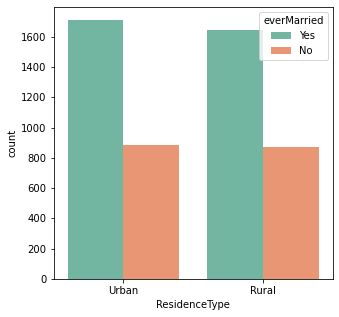

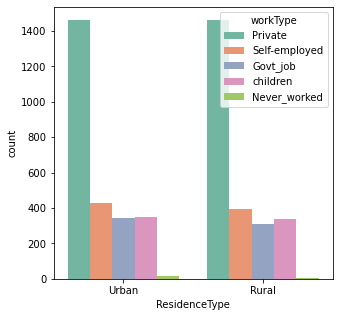

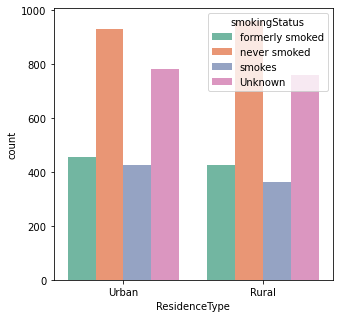

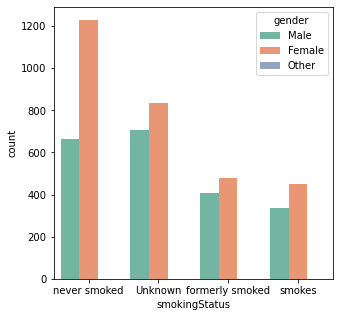

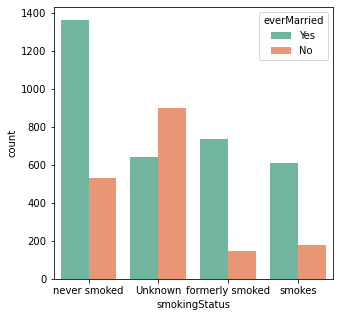

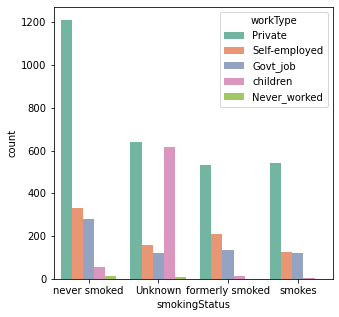

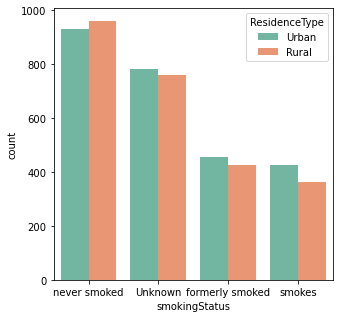

In [597]:
for i in range(0, len(cat_list)):
    primary_cat = cat_list[i]
    for j in range(0, len(cat_list)):
        secondary_cat = cat_list[j]
        if secondary_cat != primary_cat:
            plt.figure (figsize = (5,5))
            chart = sns.countplot(
                data = df,
                x= primary_cat, 
                hue= secondary_cat,
                palette = 'Set2',
                order=df[primary_cat].value_counts().iloc[:10].index #show only TOP10
              )

#  Splitting data

In [600]:
# splitting data to features and target
features = dataframe.iloc[:, :-1].values
target = dataframe.iloc[:, -1].values

In [601]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3577, 10), (1533, 10), (3577,), (1533,))

### Feature Scalling

In [602]:
# Feature Scalling using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)